In [188]:
import numpy as np
import computing, results_annalysis
import instance_genrerantion

## Création de l'instance

#### Génération d'une instance par réduction

In [189]:
from problem_reductions.npp_to_ising import *
# NPP instance
weights = [1, 2, 3, 4]

# Ising instance
J, H = npp_to_ising(weights=weights)

#### Ou génération d'un instance aléatoire

In [190]:
instance_size = 1000
J, H = instance_genrerantion.generate_instance(size=instance_size)

## Simulation avec des paramètres choisis

In [191]:
states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=0.2, n_itterations=100, n_cond_init=50, J=J, H=H, savetofile=False)

On a directement accès aux résultats et aussi aux chemin d'accès du fichier contenant l'instance, les paramètres ou les résultats si on veut y avoir accès plus tard

## Interprétation des résultats

#### On peut aller les chercher a partir du filename (si besoin)

(Mais ici on les as direct récupéré en sortie de `compute_single_instance`)

In [192]:
# states, energies = results_annalysis.open_results(path)

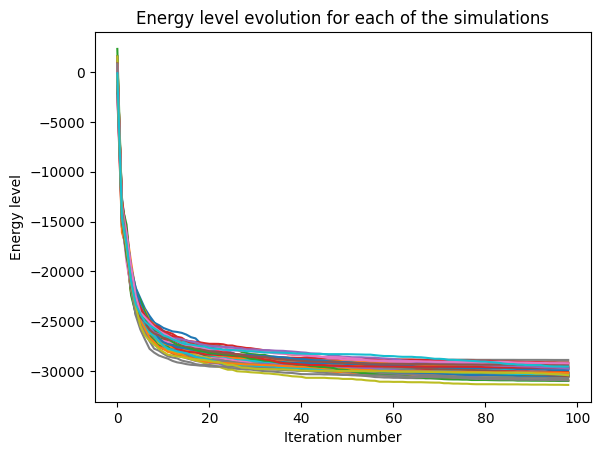

In [193]:
import matplotlib.pyplot as plt


def plot_energies_evolution_w(energies):
    n_cond_init = len(energies)
    n_iterration = len(energies[0]) -1
    abcisses = np.arange(n_iterration)

    for i in range(n_cond_init):
        plt.plot(abcisses, energies[i][1:])

    plt.xlabel("Iteration number")
    plt.ylabel("Energy level")
    plt.title("Energy level evolution for each of the simulations")

    plt.show()

plot_energies_evolution_w(energies)


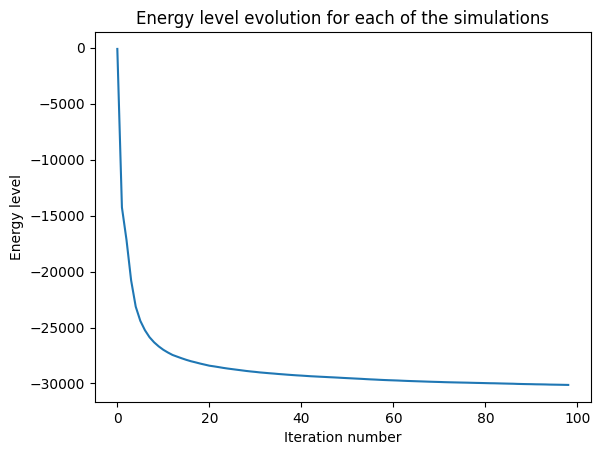

In [194]:
mean_energies = [np.mean(energies, axis=0)]
mean_energies
plot_energies_evolution_w(mean_energies)

In [195]:
import scipy.optimize as op

Y= mean_energies[0]
X = np.arange(len(Y))

#Paramètre theta=[a,b,c,d]
def regressed(theta,x):
    return theta[0] + theta[1]*np.exp(-theta[2]*(x)) 

def Objectivefunction(theta,X,Y):
    J = np.dot((regressed(theta,X)-Y).T,(regressed(theta,X)-Y))
    return J


len(X)


100

In [196]:
theta =[1,1,1]
for i in range(10):
    Result = op.minimize(fun=lambda theta: Objectivefunction(theta, X, Y), x0=theta, 
                        method = 'TNC');
    theta = Result.x

Result.x

C:\Users\hugoj\AppData\Local\Temp\ipykernel_9416\28086235.py:8: RuntimeWarning: overflow encountered in exp
  return theta[0] + theta[1]*np.exp(-theta[2]*(x))


array([-2.94478286e+04,  3.13139343e+04,  2.83757163e-01])

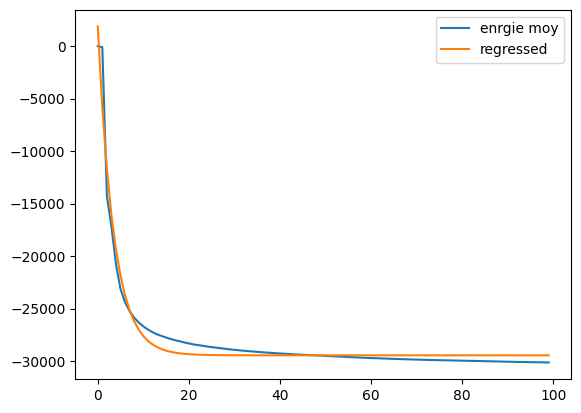

In [197]:
T=Result.x
plt.plot(X,Y,label='enrgie moy')
plt.plot(X,regressed(T,X),label='regressed')
plt.legend()
plt.show()

On remarque que la forme de nos courbes suit généralement une exponentiellement décroissante, une régression (avec perte quadratique) à 3 paramètres (a + bexp(-cx)) nous le confirme. On remarque alors que le paramètre "c" est de l'odre de grandeur du pas dt (faire plus d'expérimentation pour le montrer...). 

Ceci permet de nous donner une condition d'arrêt sur notre algo. En effet en supposant que c = dt et que l'énergie suit notre courbe expo f(x) = a + bexp(-cx) de dérivée f'(x)=-b*dt*exp(-dt*x). Condition d'arrêt peut être abs(f'(x)) < m <=> x = ln(b*dt/m)/dt

# Reste à savoir comment on peut déterminer b à partir de la matrice (regression encore??) 

In [ ]:
taille_instance = np.arange(10)
table_exp = []

for i in taille_instance:
    J, H = J, H = instance_genrerantion.generate_instance(size=i)
    table_exp.append((J,H))

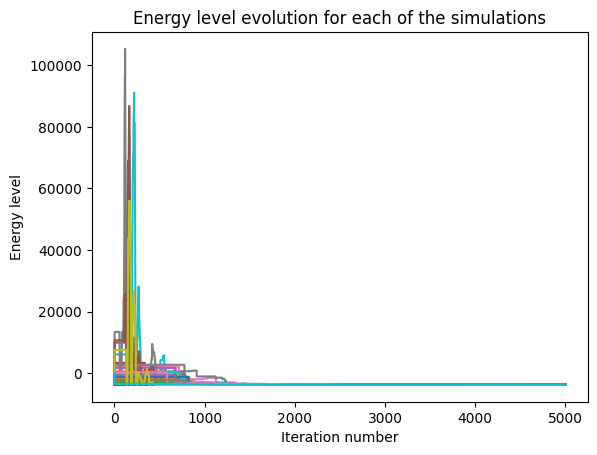

KeyboardInterrupt: 

In [198]:
#création table des matrice expérimentales 

from problem_reductions.npp_to_ising import *
# NPP instance



table_exp = []
for i in range(8):
    weights = np.random.uniform(low=-1, high=1,size=(i+1)*25)
    J, H = npp_to_ising(weights=weights)

    J = 100*J
    table_exp.append((J,H))


for i in range(4, len(table_exp)):
    J = table_exp[i][0]
    H = table_exp[i][1]
    instance_size = len(J[0])
    states, energies, path = computing.compute_single_instance(instance_size=instance_size, step=0.001, n_itterations=5000, n_cond_init=50, J=J, H=H, savetofile=False)
    mean_energies = [np.mean(energies, axis=0)]
    results_annalysis.plot_energies_evolution(energies)
